<center><h1>Module 2 Assignment</h1></center>

# Choose a dataset

Choose a dataset from [NYC Open Data](https://opendata.cityofnewyork.us/) that is available in CSV format (look at the format labels in the list of datasets). Choose one that has at least 2 numerical value columns and 1 string value column. 

If it's a CSV file you may be able to directly read it with pandas
```
pd.read_csv(url)
```

If it is a compressed file (.zip, .gz, etc.), download the zip and unpack it, then read it in with pandas
```
pd.read_csv(<filename>.csv)
```

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
data=pd.read_csv("DOF__Summary_of_Neighborhood_Sales_by_Neighborhood_Citywide_by_Borough.csv")

## Display top 7 rows of the dataframe in your notebook

In [3]:
result = data.head(7)
print("top 7 rows of the dataframe")
display(result) # Disini menggunakan display agar tabelnya rapi, kalau menggunakan print(result) kurang rapi

top 7 rows of the dataframe


BOROUGH   NEIGHBORHOOD           TYPE OF HOME  NUMBER OF SALES  \
0  MANHATTAN  ALPHABET CITY    01 ONE FAMILY HOMES                1   
1  MANHATTAN  ALPHABET CITY    02 TWO FAMILY HOMES                1   
2  MANHATTAN  ALPHABET CITY  03 THREE FAMILY HOMES                1   
3  MANHATTAN        CHELSEA    01 ONE FAMILY HOMES                2   
4  MANHATTAN        CHELSEA    02 TWO FAMILY HOMES                2   
5  MANHATTAN        CHELSEA  03 THREE FAMILY HOMES                1   
6  MANHATTAN        CLINTON    01 ONE FAMILY HOMES                1   

   LOWEST SALE PRICE  AVERAGE SALE PRICE  MEDIAN SALE PRICE  \
0             593362              593362             593362   
1            1320000             1320000            1320000   
2             900000              900000             900000   
3             500000             2875000            2875000   
4            1306213             2603107            2603107   
5            6400000             6400000            6400000   
6            3850000             3850000            3850000   

   HIGHEST SALE PRICE  YEAR  
0              593362  2010  
1             1320000  2010  
2              900000  2010  
3             5250000  2010  
4             3900000  2010  
5             6400000  2010  
6             3850000  2010

## Count number of null values (if any) for each column

In [4]:
data.isna().sum()

BOROUGH               0
NEIGHBORHOOD          1
TYPE OF HOME          0
NUMBER OF SALES       0
LOWEST SALE PRICE     0
AVERAGE SALE PRICE    0
MEDIAN SALE PRICE     0
HIGHEST SALE PRICE    0
YEAR                  0
dtype: int64

## Remove all but 2 numerical values columns of your choice and display the reducted dataframe.

In [5]:
data.columns
remove=data.drop([data.columns[0], data.columns[1], data.columns[4], data.columns[6], data.columns[7], data.columns[8]], axis=1)
display(remove) # Disini menggunakan display agar tabelnya rapi, kalau menggunakan print(result) kurang rapi

TYPE OF HOME  NUMBER OF SALES  AVERAGE SALE PRICE
0         01 ONE FAMILY HOMES                1              593362
1         02 TWO FAMILY HOMES                1             1320000
2       03 THREE FAMILY HOMES                1              900000
3         01 ONE FAMILY HOMES                2             2875000
4         02 TWO FAMILY HOMES                2             2603107
...                       ...              ...                 ...
6560  01 ONE FAMILY DWELLINGS               74              598064
6561  02 TWO FAMILY DWELLINGS               23              662768
6562  01 ONE FAMILY DWELLINGS               69              582575
6563  02 TWO FAMILY DWELLINGS               46              745061
6564  01 ONE FAMILY DWELLINGS               61              712061

[6565 rows x 3 columns]

## Display the average, median, and standard deviation of each of your numerical columns

In [6]:
remove.describe().loc[['mean', 'std', '50%']]

NUMBER OF SALES  AVERAGE SALE PRICE
mean        35.184615        1.230842e+06
std         50.179313        1.995127e+06
50%         16.000000        6.429380e+05

## Plot two of the numerical columns one against the other in a scatter plot

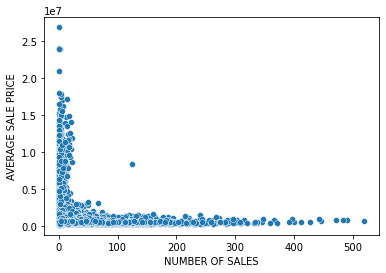

In [7]:
#scatter plot untuk NUMBER OF SALES vs AVERAGE SALES PRICE
sns.scatterplot(x='NUMBER OF SALES', y='AVERAGE SALE PRICE', data=remove);

## Plot your data distributions in histogram and boxplot

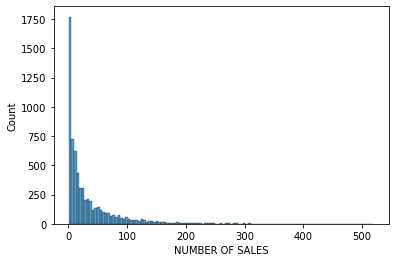

In [8]:
#Histogram untuk NUMBER OF SALES
sns.histplot(data=remove, x="NUMBER OF SALES");

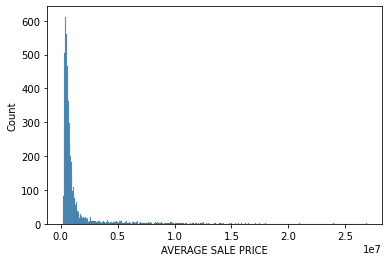

In [9]:
#Histogram untuk AVERAGE SALE PRICE
sns.histplot(data=remove, x="AVERAGE SALE PRICE");

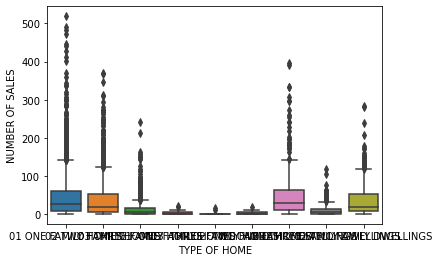

In [10]:
#Boxplot untuk NUMBER OF SALES
sns.boxplot(x='TYPE OF HOME', y='NUMBER OF SALES', data=remove);

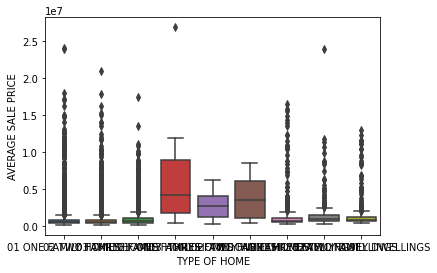

In [11]:
#Boxplot untuk AVERAGE SALE PRICE
sns.boxplot(x='TYPE OF HOME', y='AVERAGE SALE PRICE', data=remove);

## Create a new column in the same dataframe that is raised power of two of an existing column
Example:
![power_of_two](images/ex1.jpeg)


In [14]:
remove.assign(Raised_power_value=lambda x: x['AVERAGE SALE PRICE']**2)

TYPE OF HOME  NUMBER OF SALES  AVERAGE SALE PRICE  \
0         01 ONE FAMILY HOMES                1              593362   
1         02 TWO FAMILY HOMES                1             1320000   
2       03 THREE FAMILY HOMES                1              900000   
3         01 ONE FAMILY HOMES                2             2875000   
4         02 TWO FAMILY HOMES                2             2603107   
...                       ...              ...                 ...   
6560  01 ONE FAMILY DWELLINGS               74              598064   
6561  02 TWO FAMILY DWELLINGS               23              662768   
6562  01 ONE FAMILY DWELLINGS               69              582575   
6563  02 TWO FAMILY DWELLINGS               46              745061   
6564  01 ONE FAMILY DWELLINGS               61              712061   

      Raised_power_value  
0           352078463044  
1          1742400000000  
2           810000000000  
3          8265625000000  
4          6776166053449  
...                  ...  
6560        357680548096  
6561        439261421824  
6562        339393630625  
6563        555115893721  
6564        507030867721  

[6565 rows x 4 columns]

# Citi Bike investigation
![citi-bike](images/citibike.jpeg)
>Citi Bike is the largest bike share program in the US, with 20,000 bikes and over 1,300 stations across Manhattan, Brooklyn, Queens, the Bronx and Jersey City. It was designed for quick trips with convenience in mind, and it’s a fun and affordable way to get around town.

## Choose a citibikes dataset (one or two months, earlier datasets are convenient because they are smaller)

Example for downloading September 2017 Citibike data:
```
! month=201709
! curl https://s3.amazonaws.com/tripdata/$month-citibike-tripdata.csv.zip >> $month-citibike-tripdata.csv.zip
! unzip $month-citibike-tripdata.csv.zip
```

## What is the average number of trips for each day-of-week?
Process the data and plot your answer

## What is the average number of trips by hour of day?

## What is the correlation between age and trip duration?

## What is the average number of daily trips?

## Come up with a question on the Citibike data usage and formulate your hypothesis

Example: 

Women are less likely than men to choose biking for commuting.

Null Hypothesis: 

The proportion of men biking on weekends is the same or higher than the proportion of women biking on weekends



## Work with your dataset and show your findings to help answer your question